# Customer Analisis Round 7
The objective of this data is to understand customer demographics and buying behavior. Later during the week, we will use predictive analytics to analyze the most profitable customers and how they interact. After that, we will take targeted actions to increase profitable customer response, retention, and growth.

## Instructions
Remember the previous rounds. Follow the steps as shown in previous lectures and try to improve the accuracy of the model. Include both categorical columns in the exercise. Some approaches you can try in this exercise:
- use the concept of multicollinearity and remove insignificant variables
- use a different method of scaling the numerical variables
- use a different ratio of train test split
- use the transformation on numerical columns which align it more towards a normal distribution


In [1]:
import pandas as pd
import numpy as np

In [2]:
customer_analysis = pd.read_csv('files_for_lab/csv_files/marketing_customer_analysis.csv')
print("The number of rows and columns is", customer_analysis.shape)
display(customer_analysis.info()) # display infor to get a first impression on the information in the dataframe

The number of rows and columns is (9134, 24)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9134 entries, 0 to 9133
Data columns (total 24 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   Customer                       9134 non-null   object 
 1   State                          9134 non-null   object 
 2   Customer Lifetime Value        9134 non-null   float64
 3   Response                       9134 non-null   object 
 4   Coverage                       9134 non-null   object 
 5   Education                      9134 non-null   object 
 6   Effective To Date              9134 non-null   object 
 7   EmploymentStatus               9134 non-null   object 
 8   Gender                         9134 non-null   object 
 9   Income                         9134 non-null   int64  
 10  Location Code                  9134 non-null   object 
 11  Marital Status                 9134 non-null   object 
 12  Mon

None

In [3]:
customer_analysis.head(10) # check how the information is stored to later apply standardizations

,Customer,State,Customer Lifetime Value,Response,Coverage,Education,Effective To Date,EmploymentStatus,Gender,Income,...,Months Since Policy Inception,Number of Open Complaints,Number of Policies,Policy Type,Policy,Renew Offer Type,Sales Channel,Total Claim Amount,Vehicle Class,Vehicle Size
0,BU79786,Washington,2763.519279,No,Basic,Bachelor,2/24/11,Employed,F,56274,...,5,0,1,Corporate Auto,Corporate L3,Offer1,Agent,384.811147,Two-Door Car,Medsize
1,QZ44356,Arizona,6979.535903,No,Extended,Bachelor,1/31/11,Unemployed,F,0,...,42,0,8,Personal Auto,Personal L3,Offer3,Agent,1131.464935,Four-Door Car,Medsize
2,AI49188,Nevada,12887.431650,No,Premium,Bachelor,2/19/11,Employed,F,48767,...,38,0,2,Personal Auto,Personal L3,Offer1,Agent,566.472247,Two-Door Car,Medsize
3,WW63253,California,7645.861827,No,Basic,Bachelor,1/20/11,Unemployed,M,0,...,65,0,7,Corporate Auto,Corporate L2,Offer1,Call Center,529.881344,SUV,Medsize
4,HB64268,Washington,2813.692575,No,Basic,Bachelor,2/3/11,Employed,M,43836,...,44,0,1,Personal Auto,Personal L1,Offer1,Agent,138.130879,Four-Door Car,Medsize
5,OC83172,Oregon,8256.297800,Yes,Basic,Bachelor,1/25/11,Employed,F,62902,...,94,0,2,Personal Auto,Personal L3,Offer2,Web,159.383042,Two-Door Car,Medsize
6,XZ87318,Oregon,5380.898636,Yes,Basic,College,2/24/11,Employed,F,55350,...,13,0,9,Corporate Auto,Corporate L3,Offer1,Agent,321.600000,Four-Door Car,Medsize
7,CF85061,Arizona,7216.100311,No,Premium,Master,1/18/11,Unemployed,M,0,...,68,0,4,Corporate Auto,Corporate L3,Offer1,Agent,363.029680,Four-Door Car,Medsize
8,DY87989,Oregon,24127.504020,Yes,Basic,Bachelor,1/26/11,Medical Leave,M,14072,...,3,0,2,Corporate Auto,Corporate L3,Offer1,Agent,511.200000,Four-Door Car,Medsize
9,BQ94931,Oregon,7388.178085,No,Extended,College,2/17/11,Employed,F,28812,...,7,0,8,Special Auto,Special L2,Offer2,Branch,425.527834,Four-Door Car,Medsize


Standardize columns

In [4]:
def standardize_columns(df):
    '''
This functions replaces the names of the columns by the lower case version,
blank spaces for underscores '_' and drops the column "Unnamed: 0" with index values
input: data frame
    '''
    df.columns = df.columns.str.lower().str.replace(' ', '_')
    return df # I had to change this part because in this version of the csv file there is no "unnamed: 0" column (before: return df.drop(['unnamed:_0'], axis=1))
def clean_columns (df):
    df = standardize_columns(df)
    df['effective_to_date'] = pd.to_datetime(df['effective_to_date'], errors='coerce')
    df['effective_month'] = df['effective_to_date'].dt.month
    return df

In [5]:
customer_copy = customer_analysis.copy() # work on the copy

In [6]:
customer_copy = clean_columns(customer_copy) # apply standardization
customer_copy.head(10)

,customer,state,customer_lifetime_value,response,coverage,education,effective_to_date,employmentstatus,gender,income,...,number_of_open_complaints,number_of_policies,policy_type,policy,renew_offer_type,sales_channel,total_claim_amount,vehicle_class,vehicle_size,effective_month
0,BU79786,Washington,2763.519279,No,Basic,Bachelor,2011-02-24,Employed,F,56274,...,0,1,Corporate Auto,Corporate L3,Offer1,Agent,384.811147,Two-Door Car,Medsize,2
1,QZ44356,Arizona,6979.535903,No,Extended,Bachelor,2011-01-31,Unemployed,F,0,...,0,8,Personal Auto,Personal L3,Offer3,Agent,1131.464935,Four-Door Car,Medsize,1
2,AI49188,Nevada,12887.431650,No,Premium,Bachelor,2011-02-19,Employed,F,48767,...,0,2,Personal Auto,Personal L3,Offer1,Agent,566.472247,Two-Door Car,Medsize,2
3,WW63253,California,7645.861827,No,Basic,Bachelor,2011-01-20,Unemployed,M,0,...,0,7,Corporate Auto,Corporate L2,Offer1,Call Center,529.881344,SUV,Medsize,1
4,HB64268,Washington,2813.692575,No,Basic,Bachelor,2011-02-03,Employed,M,43836,...,0,1,Personal Auto,Personal L1,Offer1,Agent,138.130879,Four-Door Car,Medsize,2
5,OC83172,Oregon,8256.297800,Yes,Basic,Bachelor,2011-01-25,Employed,F,62902,...,0,2,Personal Auto,Personal L3,Offer2,Web,159.383042,Two-Door Car,Medsize,1
6,XZ87318,Oregon,5380.898636,Yes,Basic,College,2011-02-24,Employed,F,55350,...,0,9,Corporate Auto,Corporate L3,Offer1,Agent,321.600000,Four-Door Car,Medsize,2
7,CF85061,Arizona,7216.100311,No,Premium,Master,2011-01-18,Unemployed,M,0,...,0,4,Corporate Auto,Corporate L3,Offer1,Agent,363.029680,Four-Door Car,Medsize,1
8,DY87989,Oregon,24127.504020,Yes,Basic,Bachelor,2011-01-26,Medical Leave,M,14072,...,0,2,Corporate Auto,Corporate L3,Offer1,Agent,511.200000,Four-Door Car,Medsize,1
9,BQ94931,Oregon,7388.178085,No,Extended,College,2011-02-17,Employed,F,28812,...,0,8,Special Auto,Special L2,Offer2,Branch,425.527834,Four-Door Car,Medsize,2


In [7]:
nulls = pd.DataFrame(round(customer_copy.isna().sum()/len(customer_copy),4)*100) # check for missing values
display(nulls)

,0
customer,0.0
state,0.0
customer_lifetime_value,0.0
response,0.0
coverage,0.0
education,0.0
effective_to_date,0.0
employmentstatus,0.0
gender,0.0
income,0.0


## Explore the data

In [8]:
numerical = customer_copy.select_dtypes(include=np.number)
categorical = customer_copy.select_dtypes(include=object)
display(numerical.info())
display(categorical.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9134 entries, 0 to 9133
Data columns (total 9 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   customer_lifetime_value        9134 non-null   float64
 1   income                         9134 non-null   int64  
 2   monthly_premium_auto           9134 non-null   int64  
 3   months_since_last_claim        9134 non-null   int64  
 4   months_since_policy_inception  9134 non-null   int64  
 5   number_of_open_complaints      9134 non-null   int64  
 6   number_of_policies             9134 non-null   int64  
 7   total_claim_amount             9134 non-null   float64
 8   effective_month                9134 non-null   int64  
dtypes: float64(2), int64(7)
memory usage: 642.4 KB


None

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9134 entries, 0 to 9133
Data columns (total 15 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   customer          9134 non-null   object
 1   state             9134 non-null   object
 2   response          9134 non-null   object
 3   coverage          9134 non-null   object
 4   education         9134 non-null   object
 5   employmentstatus  9134 non-null   object
 6   gender            9134 non-null   object
 7   location_code     9134 non-null   object
 8   marital_status    9134 non-null   object
 9   policy_type       9134 non-null   object
 10  policy            9134 non-null   object
 11  renew_offer_type  9134 non-null   object
 12  sales_channel     9134 non-null   object
 13  vehicle_class     9134 non-null   object
 14  vehicle_size      9134 non-null   object
dtypes: object(15)
memory usage: 1.0+ MB


None

Checking normality of numerical variables

In [9]:
import matplotlib.pyplot as plt
import seaborn as sns 
%matplotlib inline

In [10]:
numerical.describe().T

,count,mean,std,min,25%,50%,75%,max
customer_lifetime_value,9134.0,8004.940475,6870.967608,1898.007675,3994.251794,5780.182197,8962.167041,83325.381190
income,9134.0,37657.380009,30379.904734,0.000000,0.000000,33889.500000,62320.000000,99981.000000
monthly_premium_auto,9134.0,93.219291,34.407967,61.000000,68.000000,83.000000,109.000000,298.000000
months_since_last_claim,9134.0,15.097000,10.073257,0.000000,6.000000,14.000000,23.000000,35.000000
months_since_policy_inception,9134.0,48.064594,27.905991,0.000000,24.000000,48.000000,71.000000,99.000000
number_of_open_complaints,9134.0,0.384388,0.910384,0.000000,0.000000,0.000000,0.000000,5.000000
number_of_policies,9134.0,2.966170,2.390182,1.000000,1.000000,2.000000,4.000000,9.000000
total_claim_amount,9134.0,434.088794,290.500092,0.099007,272.258244,383.945434,547.514839,2893.239678
effective_month,9134.0,1.463762,0.498712,1.000000,1.000000,1.000000,2.000000,2.000000


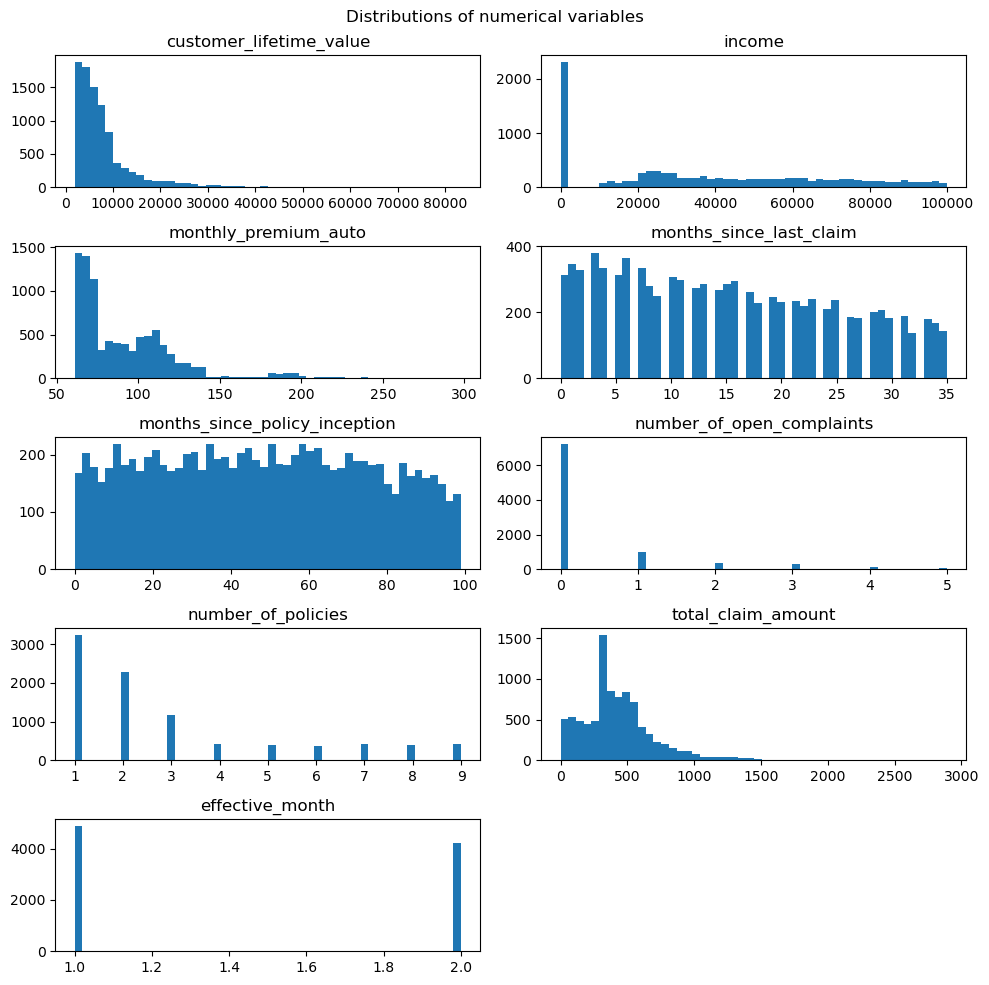

In [11]:
def draw_histograms(df, variables, n_rows, n_cols):
    fig=plt.figure()
    for i, var_name in enumerate(variables):
        ax=fig.add_subplot(n_rows,n_cols,i+1)
        df[var_name].hist(bins=50,ax=ax,figsize=(10,10))
        ax.set_title(var_name)
        ax.grid(False)
    fig.suptitle('Distributions of numerical variables')
    fig.tight_layout()  
    plt.show()

draw_histograms(numerical, numerical.columns, 5, 2) 

Multicollinearity between variables

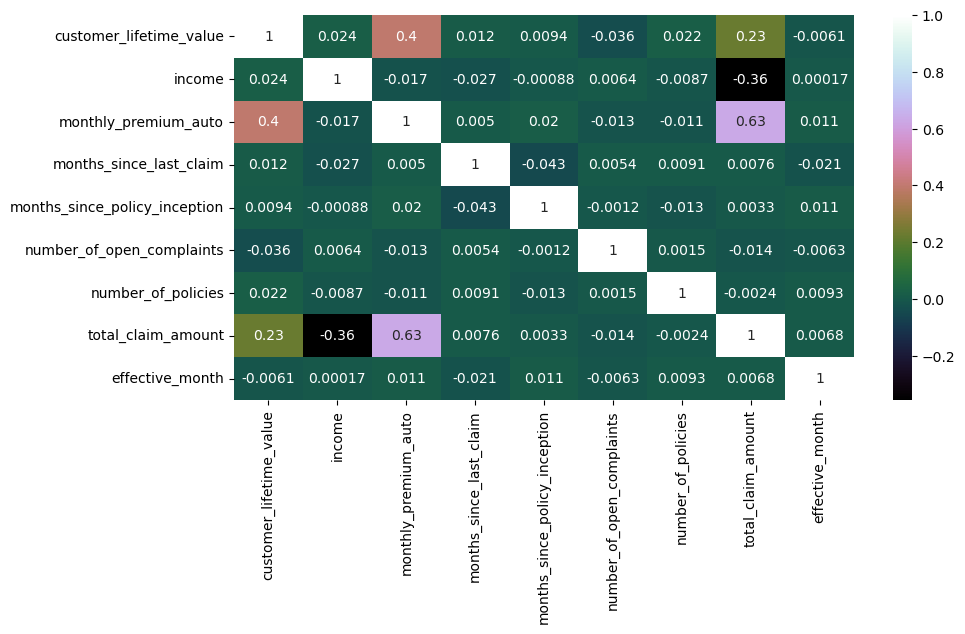

In [12]:
correlations_matrix = numerical.corr()
plt.figure(figsize=(10,5))
sns.heatmap(correlations_matrix, annot=True, cmap="cubehelix") # annot = False: doesn't show the values of the correlation
plt.show()
# No high correlation between the independent variables. Dependent: total claim amount

Drop variables with low correlation with the dependent variable (total claim amount). Keep: customer lifetime value, income and monthly premium auto (although the correlations for the first two is low).

In [13]:
numerical = numerical.drop(['months_since_last_claim', 'months_since_policy_inception', 'number_of_open_complaints','number_of_policies', 'effective_month' ], axis=1)
display(numerical.head())

,customer_lifetime_value,income,monthly_premium_auto,total_claim_amount
0,2763.519279,56274,69,384.811147
1,6979.535903,0,94,1131.464935
2,12887.431650,48767,108,566.472247
3,7645.861827,0,106,529.881344
4,2813.692575,43836,73,138.130879


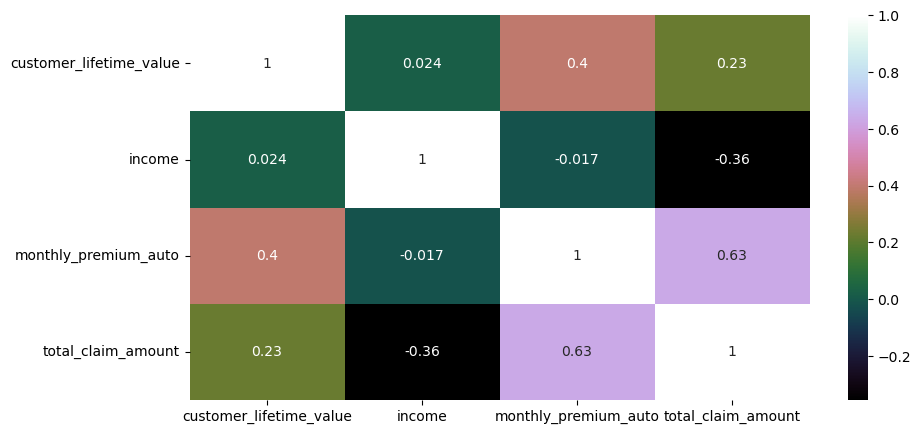

In [14]:
correlations_matrix = numerical.corr()
plt.figure(figsize=(10,5))
sns.heatmap(correlations_matrix, annot=True, cmap="cubehelix") # annot = False: doesn't show the values of the correlation
plt.show()

## Building the model

x-y split

In [15]:
# Build X and y
y = customer_copy['total_claim_amount'] # Dependent
X = customer_copy.drop(['total_claim_amount'], axis=1)

In [16]:
# Drop numerical variables decided before
X = X.drop(['customer', 'months_since_last_claim', 'months_since_policy_inception', 'number_of_open_complaints','number_of_policies', 'effective_month' ], axis=1)
display(X.head())
# Drop customer from the categorical data because it's just an identification number for th customer
# and doesn't influence the prediction.
# Also, when applying transformations like "One hot" it will create as many columns as costumer
# making our dataframe unnecessarily big.

,state,customer_lifetime_value,response,coverage,education,effective_to_date,employmentstatus,gender,income,location_code,marital_status,monthly_premium_auto,policy_type,policy,renew_offer_type,sales_channel,vehicle_class,vehicle_size
0,Washington,2763.519279,No,Basic,Bachelor,2011-02-24,Employed,F,56274,Suburban,Married,69,Corporate Auto,Corporate L3,Offer1,Agent,Two-Door Car,Medsize
1,Arizona,6979.535903,No,Extended,Bachelor,2011-01-31,Unemployed,F,0,Suburban,Single,94,Personal Auto,Personal L3,Offer3,Agent,Four-Door Car,Medsize
2,Nevada,12887.431650,No,Premium,Bachelor,2011-02-19,Employed,F,48767,Suburban,Married,108,Personal Auto,Personal L3,Offer1,Agent,Two-Door Car,Medsize
3,California,7645.861827,No,Basic,Bachelor,2011-01-20,Unemployed,M,0,Suburban,Married,106,Corporate Auto,Corporate L2,Offer1,Call Center,SUV,Medsize
4,Washington,2813.692575,No,Basic,Bachelor,2011-02-03,Employed,M,43836,Rural,Single,73,Personal Auto,Personal L1,Offer1,Agent,Four-Door Car,Medsize


In [17]:
X.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9134 entries, 0 to 9133
Data columns (total 18 columns):
 #   Column                   Non-Null Count  Dtype         
---  ------                   --------------  -----         
 0   state                    9134 non-null   object        
 1   customer_lifetime_value  9134 non-null   float64       
 2   response                 9134 non-null   object        
 3   coverage                 9134 non-null   object        
 4   education                9134 non-null   object        
 5   effective_to_date        9134 non-null   datetime64[ns]
 6   employmentstatus         9134 non-null   object        
 7   gender                   9134 non-null   object        
 8   income                   9134 non-null   int64         
 9   location_code            9134 non-null   object        
 10  marital_status           9134 non-null   object        
 11  monthly_premium_auto     9134 non-null   int64         
 12  policy_type              9134 non-

Train-test split

In [18]:
# split train and test
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [19]:
X_train_df = pd.DataFrame(X_train, columns=X.columns) # cast the lists created when doing the split into dataframes
X_test_df  = pd.DataFrame(X_test,  columns=X.columns)

X_train_num = X_train_df.select_dtypes(include = np.number) # separate numeric and categorical
X_test_num  = X_test_df.select_dtypes(include = np.number)
X_train_cat = X_train_df.select_dtypes(['object'])
X_test_cat  = X_test_df.select_dtypes(['object'])


Normalize numerical variables

In [20]:
from sklearn.preprocessing import PowerTransformer
from sklearn.preprocessing import MinMaxScaler

In [21]:
X_train_num.describe().T

,count,mean,std,min,25%,50%,75%,max
customer_lifetime_value,6393.0,7975.945276,6718.376651,1898.007675,4068.092649,5811.996703,8986.610653,83325.38119
income,6393.0,37730.048647,30224.509605,0.000000,10337.000000,33967.000000,62326.000000,99981.00000
monthly_premium_auto,6393.0,93.364148,34.549800,61.000000,68.000000,83.000000,109.000000,297.00000


Box-cox transformation after log transforming 'income' for dealing with zeros (option1)
- Log transformation of income

In [33]:
def log_transfom_clean2(x):
    x = np.log10(x)
    if np.isfinite(x):
        return x
    else:
        return np.NAN # We are returning NaNs so that we can replace them with means later

C:\Users\marta\AppData\Local\Temp\ipykernel_24528\969396912.py:2: RuntimeWarning: divide by zero encountered in log10
  x = np.log10(x)


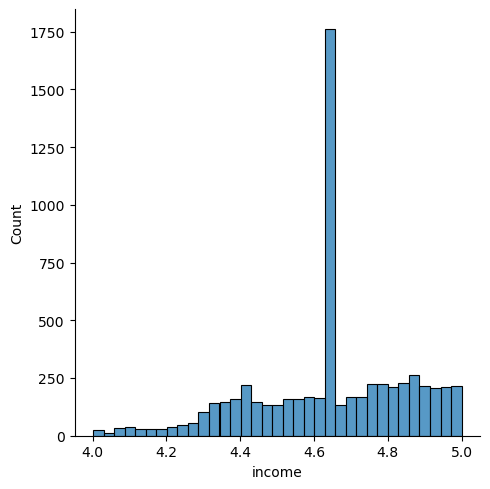

In [34]:
data_train = X_train_num.copy()
data_train['income'] = list(map(log_transfom_clean2, data_train['income']))
# Now we replace the NAN by the mean
data_train['income'] = data_train['income'].fillna(np.mean(data_train['income']))
sns.displot(data_train['income'])
plt.show()

C:\Users\marta\AppData\Local\Temp\ipykernel_24528\969396912.py:2: RuntimeWarning: divide by zero encountered in log10
  x = np.log10(x)


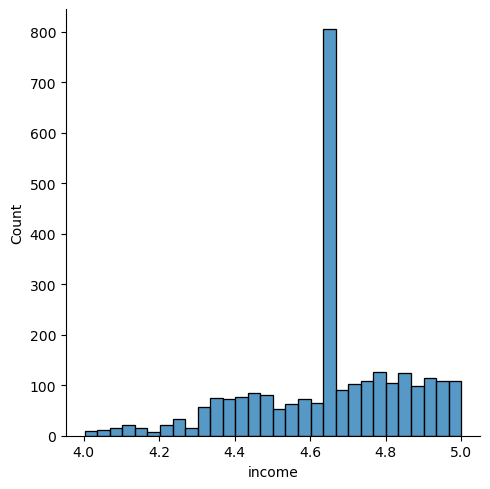

In [35]:
data_test = X_test_num.copy()
data_test['income'] = list(map(log_transfom_clean2, data_test['income']))
# Now we replace the NAN by the mean
data_test['income'] = data_test['income'].fillna(np.mean(data_test['income']))
sns.displot(data_test['income'])
plt.show()

In [40]:
transformer = PowerTransformer(method='box-cox') # Normalizes data: stabilize variance, minimize skewness
transformer.fit(data_train) # we will reuse this transformer for X_test later

X_train_scaled = transformer.transform(data_train) # np array
X_test_scaled  = transformer.transform(data_test) # np array
X_train_scaled = pd.DataFrame(X_train_scaled, columns=data_train.columns)
X_test_scaled  = pd.DataFrame(X_test_scaled,  columns=data_test.columns)
display(X_train_scaled.head())
display(X_train_scaled.describe().T)

,customer_lifetime_value,income,monthly_premium_auto
0,-0.274989,0.137110,1.275799
1,-0.229705,-1.056302,1.291414
2,-0.313343,-2.192195,1.406539
3,0.559563,-0.090846,1.120894
4,-1.060915,1.029647,-0.018178


,count,mean,std,min,25%,50%,75%,max
customer_lifetime_value,6393.0,-9.460219e-15,1.000078,-2.249913,-0.648022,-0.027274,0.637400,2.864997
income,6393.0,6.103188e-16,1.000078,-2.506566,-0.625982,-0.090846,0.726838,2.003579
monthly_premium_auto,6393.0,-8.370028e-14,1.000078,-1.538575,-0.923615,-0.018178,0.864639,2.264011


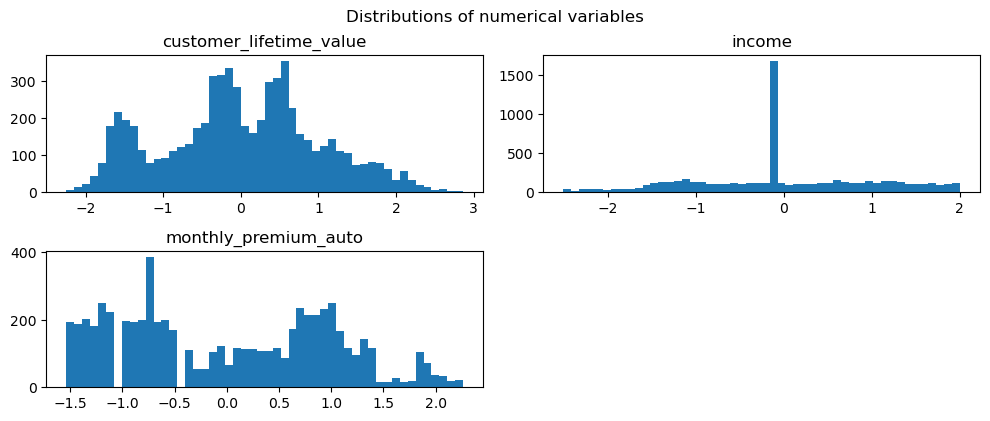

In [37]:
draw_histograms(X_train_scaled, X_train_scaled.columns, 5, 2) # not fully convinced with the outcome

In [63]:
X_train_copy = X_train_num.copy()
X_train_copy.head()

,customer_lifetime_value,income,monthly_premium_auto
5123,4768.955924,51144,61
7738,2827.559570,0,79
214,2912.892035,81097,74
8580,5138.244998,72264,64
7857,2610.369217,54737,66


MinMaxScaler (option2)

In [22]:
# Normalizing data
transformer2 = MinMaxScaler()
transformer2.fit(X_train_num) # we will reuse this transformer for X_test later
X_train_scaled2 = transformer2.transform(X_train_num) # np array
X_test_scaled2  = transformer2.transform(X_test_num) # np array
X_train_scaled2 = pd.DataFrame(X_train_scaled2, columns=X_train_num.columns)
X_test_scaled2  = pd.DataFrame(X_test_scaled2, columns=X_test_num.columns)
display(X_train_scaled2.head())
display(X_train_scaled2.describe().T)

,customer_lifetime_value,income,monthly_premium_auto
0,0.038280,0.485762,0.292373
1,0.039929,0.268821,0.296610
2,0.036927,0.129045,0.330508
3,0.081208,0.000000,0.254237
4,0.016954,0.702603,0.093220


,count,mean,std,min,25%,50%,75%,max
customer_lifetime_value,6393.0,0.074642,0.082508,0.0,0.026651,0.048067,0.087054,1.0
income,6393.0,0.377372,0.302303,0.0,0.103390,0.339735,0.623378,1.0
monthly_premium_auto,6393.0,0.137136,0.146397,0.0,0.029661,0.093220,0.203390,1.0


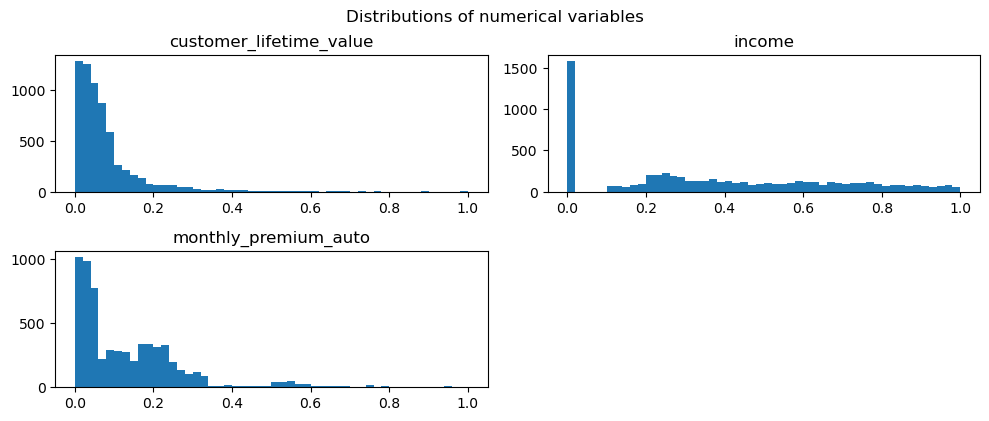

In [23]:
draw_histograms(X_train_scaled2, X_train_scaled2.columns, 5, 2) 

Alternative: Standard scaler

In [46]:
# Tested on this scaler but discarded
from sklearn.preprocessing import StandardScaler
Standardtransformer = StandardScaler()
Standardtransformer.fit(X_train_num) # This will obtain the mean and the sd of each column
X_train_stand = Standardtransformer.transform(X_train_num) # Applies the transformation
print("The numpy array looks like this: ",X_train_stand)
print("The type of x_normalized is {} and the shape of the array is {}".format(type(X_train_stand),X_train_stand.shape))
X_train_stand = pd.DataFrame(X_train_stand,columns=X_train_num.columns)
display(X_train_stand.head())

X_test_stand = Standardtransformer.transform(X_test_num)
X_test_stand  = pd.DataFrame(X_test_stand, columns=X_test_num.columns)
display(X_test_stand)

The numpy array looks like this:  [[-0.4791244   0.45134656 -0.93902843]
 [-0.76499347 -1.24271378 -0.41995333]
 [-0.75242833  1.44349011 -0.56414086]
 ...
 [ 0.14283022 -1.24271378  1.02192195]
 [ 0.97370926 -1.24271378  1.31029701]
 [-0.68811765  1.34395445 -0.2757658 ]]
The type of x_normalized is <class 'numpy.ndarray'> and the shape of the array is (7307, 3)


,customer_lifetime_value,income,monthly_premium_auto
0,-0.479124,0.451347,-0.939028
1,-0.764993,-1.242714,-0.419953
2,-0.752428,1.443490,-0.564141
3,-0.424747,1.150912,-0.852516
4,-0.796975,0.570359,-0.794841


,customer_lifetime_value,income,monthly_premium_auto
0,-0.559570,1.227791,0.358659
1,-0.369367,-0.473656,-0.650653
2,-0.620606,1.900791,0.012609
3,-0.015898,1.312852,0.156797
4,-0.013410,-0.455405,-0.708328
...,...,...,...
1822,0.098063,0.714810,0.474009
1823,-0.058783,1.072608,-0.852516
1824,-0.495109,1.732889,0.647034
1825,-0.873696,-1.242714,-0.881353


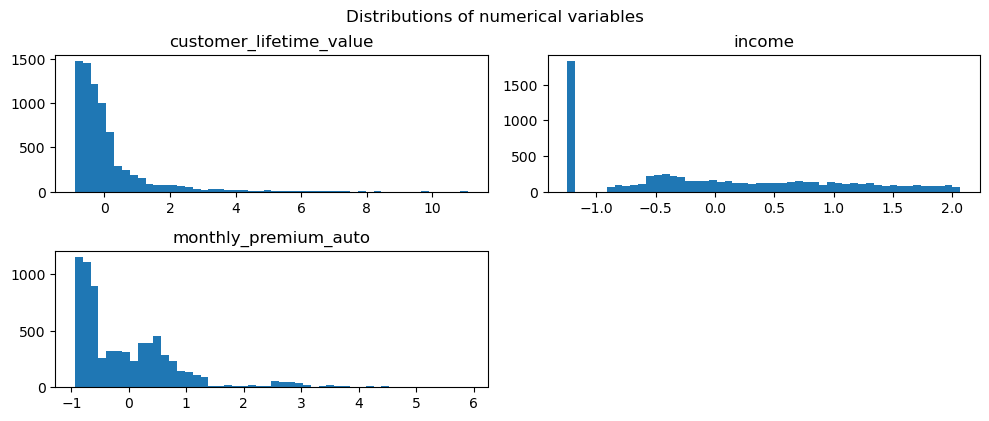

In [47]:
draw_histograms(X_train_stand, X_train_stand.columns, 5, 2) 

In [ ]:
# Concatanation when applying different transformations
# pd.concat([X_num,x_normalized,x_standardized],axis=1)

Transform categorical values
- One hot / label encoder

In [ ]:
display(X_train_cat['response'].unique())
display(X_train_cat['coverage'].unique())
display(X_train_cat['gender'].unique())
display(X_train_cat['effective_month'].unique())

In [24]:
from sklearn.preprocessing import OneHotEncoder

encoder = OneHotEncoder(drop='first') # The option drop='first' drops one of the possible values. Reduces number of columns.
encoder.fit(X_train_cat)

X_train_cat_encoded = encoder.transform(X_train_cat).toarray() # we need to cast it as an array

X_train_encoded_df = pd.DataFrame(X_train_cat_encoded, columns=encoder.get_feature_names_out())
X_train_encoded_df.head(10)

,state_California,state_Nevada,state_Oregon,state_Washington,response_Yes,coverage_Extended,coverage_Premium,education_College,education_Doctor,education_High School or Below,...,sales_channel_Branch,sales_channel_Call Center,sales_channel_Web,vehicle_class_Luxury Car,vehicle_class_Luxury SUV,vehicle_class_SUV,vehicle_class_Sports Car,vehicle_class_Two-Door Car,vehicle_size_Medsize,vehicle_size_Small
0,0.0,0.0,0.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0
1,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0
2,1.0,0.0,0.0,0.0,1.0,1.0,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0
3,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0
4,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
5,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
6,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
7,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,...,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0
8,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
9,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [ ]:
# Apply One Hot encoder to test set
encoded_test_cat = encoder.transform(X_test_cat).toarray()
onehot_encoded_test_df = pd.DataFrame(encoded_test_cat, columns=encoder.get_feature_names_out())
onehot_encoded_test_df.head()

In [ ]:
# Do not run this code
from sklearn.preprocessing import LabelEncoder
label_encoder = LabelEncoder()
label_encoder.fit(X_cat)
X_cat_trans = label_encoder.transform(X_cat) # ordered wrt value counts
X_cat_trans = pd.DataFrame(X_cat_trans,columns=X_cat.columns)
display(X_cat_trans.head(20))
X_cat_trans['gender'].value_counts()

## Linear regression

In [ ]:
from sklearn.linear_model import LinearRegression
lm = LinearRegression()

### Box-cox transformation (+log)

Concatenate numrical and categorical variables

In [41]:
X_train_treated_df1 = pd.concat([X_train_scaled, X_train_encoded_df], axis=1)
display(X_train_treated_df1)
X_test_treated_df1 = pd.concat([X_test_scaled, onehot_encoded_test_df], axis=1)
display(X_test_treated_df1)

,customer_lifetime_value,income,monthly_premium_auto,state_California,state_Nevada,state_Oregon,state_Washington,response_Yes,coverage_Extended,coverage_Premium,...,sales_channel_Branch,sales_channel_Call Center,sales_channel_Web,vehicle_class_Luxury Car,vehicle_class_Luxury SUV,vehicle_class_SUV,vehicle_class_Sports Car,vehicle_class_Two-Door Car,vehicle_size_Medsize,vehicle_size_Small
0,-0.274989,0.137110,1.275799,0.0,0.0,0.0,1.0,1.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0
1,-0.229705,-1.056302,1.291414,0.0,0.0,1.0,0.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0
2,-0.313343,-2.192195,1.406539,1.0,0.0,0.0,0.0,1.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0
3,0.559563,-0.090846,1.120894,0.0,0.0,0.0,0.0,0.0,1.0,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0
4,-1.060915,1.029647,-0.018178,0.0,0.0,0.0,0.0,0.0,1.0,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6388,0.339527,1.635668,-1.538575,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
6389,-0.118844,-1.362240,-0.571062,1.0,0.0,0.0,0.0,1.0,0.0,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
6390,0.638372,-0.090846,1.259887,1.0,0.0,0.0,0.0,0.0,1.0,0.0,...,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0
6391,1.275255,-0.090846,1.406539,0.0,0.0,0.0,0.0,1.0,1.0,0.0,...,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0


,customer_lifetime_value,income,monthly_premium_auto,state_California,state_Nevada,state_Oregon,state_Washington,response_Yes,coverage_Extended,coverage_Premium,...,sales_channel_Branch,sales_channel_Call Center,sales_channel_Web,vehicle_class_Luxury Car,vehicle_class_Luxury SUV,vehicle_class_SUV,vehicle_class_Sports Car,vehicle_class_Two-Door Car,vehicle_size_Medsize,vehicle_size_Small
0,-0.579639,1.186369,0.789357,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0
1,-0.114177,-1.310990,-0.704807,0.0,0.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0
2,-0.771247,1.851883,0.428250,0.0,0.0,1.0,0.0,1.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0
3,0.453574,1.276426,0.591732,1.0,0.0,0.0,0.0,0.0,1.0,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
4,0.456726,-1.271176,-0.848092,0.0,0.0,0.0,1.0,0.0,0.0,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2736,-0.531830,1.575886,0.840113,0.0,0.0,1.0,0.0,0.0,0.0,1.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
2737,0.644410,-0.042133,1.139491,0.0,0.0,0.0,1.0,1.0,1.0,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0
2738,-0.111706,1.560106,1.365306,0.0,0.0,0.0,0.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0
2739,-0.248335,-0.042133,-0.704807,0.0,0.0,1.0,0.0,0.0,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0


In [42]:
# Linear model
lm.fit(X_train_treated_df1,y_train)

LinearRegression()

In [43]:
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error
y_pred_train1 = lm.predict(X_train_treated_df1)
y_pred_test1 = lm.predict(X_test_treated_df1)

Error metrics

In [45]:
# R squared
r2_train = r2_score(y_train, y_pred_train1)
print("The R2 of train lm is",round(r2_train,2))
r2_test = r2_score(y_test, y_pred_test1)
print("The R2 of test lm is",round(r2_test,2))

#Mean squared error
mse_train = (mean_squared_error(y_train, y_pred_train1))
print("The mse of train set lm is", round(mse_train,2))
mse_test = (mean_squared_error(y_test,y_pred_test1))
print("The mse of test set lm is",round(mse_test,2))

# Root mean squared error
rmse_train = np.sqrt(mean_squared_error(y_train, y_pred_train1))
print("The RMSE of train lm is",round(rmse_train, 2))
rmse_test=np.sqrt(mean_squared_error(y_test,y_pred_test1))
print("The RMSE of test lm is",round(rmse_test,2))

# Mean absolute error
mae_train = mean_absolute_error(y_train, y_pred_train1)
print("The mean absolute error for the train lm",round(mae_train,2))
mae_test = mean_absolute_error(y_test, y_pred_test1)
print("The mean absolute error of the test lm is", round(mae_test,2))

The R2 of train lm is 0.76
The R2 of test lm is 0.74
The mse of train set lm is 20165.28
The mse of test set lm is 20864.69
The RMSE of train lm is 142.0
The RMSE of test lm is 144.45
The mean absolute error for the train lm 97.42
The mean absolute error of the test lm is 97.34


### MinMax scaler

Concatenate numerical and categorical variables

In [26]:
X_train_treated_df2 = pd.concat([X_train_scaled2, X_train_encoded_df], axis=1)
display(X_train_treated_df2)
X_test_treated_df2 = pd.concat([X_test_scaled2, onehot_encoded_test_df], axis=1)
display(X_test_treated_df2)

,customer_lifetime_value,income,monthly_premium_auto,state_California,state_Nevada,state_Oregon,state_Washington,response_Yes,coverage_Extended,coverage_Premium,...,sales_channel_Branch,sales_channel_Call Center,sales_channel_Web,vehicle_class_Luxury Car,vehicle_class_Luxury SUV,vehicle_class_SUV,vehicle_class_Sports Car,vehicle_class_Two-Door Car,vehicle_size_Medsize,vehicle_size_Small
0,0.038280,0.485762,0.292373,0.0,0.0,0.0,1.0,1.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0
1,0.039929,0.268821,0.296610,0.0,0.0,1.0,0.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0
2,0.036927,0.129045,0.330508,1.0,0.0,0.0,0.0,1.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0
3,0.081208,0.000000,0.254237,0.0,0.0,0.0,0.0,0.0,1.0,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0
4,0.016954,0.702603,0.093220,0.0,0.0,0.0,0.0,0.0,1.0,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6388,0.066763,0.879737,0.000000,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
6389,0.044223,0.225243,0.050847,1.0,0.0,0.0,0.0,1.0,0.0,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
6390,0.087130,0.000000,0.288136,1.0,0.0,0.0,0.0,0.0,1.0,0.0,...,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0
6391,0.156427,0.000000,0.330508,0.0,0.0,0.0,0.0,1.0,1.0,0.0,...,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0


,customer_lifetime_value,income,monthly_premium_auto,state_California,state_Nevada,state_Oregon,state_Washington,response_Yes,coverage_Extended,coverage_Premium,...,sales_channel_Branch,sales_channel_Call Center,sales_channel_Web,vehicle_class_Luxury Car,vehicle_class_Luxury SUV,vehicle_class_SUV,vehicle_class_Sports Car,vehicle_class_Two-Door Car,vehicle_size_Medsize,vehicle_size_Small
0,0.028548,0.745992,0.190678,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0
1,0.044412,0.232224,0.042373,0.0,0.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0
2,0.023458,0.949210,0.139831,0.0,0.0,1.0,0.0,1.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0
3,0.073892,0.771677,0.161017,1.0,0.0,0.0,0.0,0.0,1.0,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
4,0.074099,0.237735,0.033898,0.0,0.0,0.0,1.0,0.0,0.0,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2736,0.029933,0.861124,0.199153,0.0,0.0,1.0,0.0,0.0,0.0,1.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
2737,0.087602,0.000000,0.258475,0.0,0.0,0.0,1.0,1.0,1.0,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0
2738,0.044512,0.856253,0.317797,0.0,0.0,0.0,0.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0
2739,0.039243,0.000000,0.042373,0.0,0.0,1.0,0.0,0.0,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0


In [27]:
# Linear model
lm.fit(X_train_treated_df2,y_train)

LinearRegression()

Error metrics

In [28]:
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error
y_pred_train2 = lm.predict(X_train_treated_df2)
y_pred_test2 = lm.predict(X_test_treated_df2)

In [29]:
r2_train = r2_score(y_train, y_pred_train2)
print("The R2 of train lm is",round(r2_train,2))
r2_test = r2_score(y_test, y_pred_test2)
print("The R2 of test lm is",round(r2_test,2))

The R2 of train lm is 0.77
The R2 of test lm is 0.76


In [30]:
#Mean squared error
mse_train = (mean_squared_error(y_train, y_pred_train2))
print("The mse of train set lm is", round(mse_train,2))

mse_test = (mean_squared_error(y_test,y_pred_test2))
print("The mse of test set lm is",round(mse_test,2))

The mse of train set lm is 19326.32
The mse of test set lm is 19192.92


In [31]:
# Root mean squared error
rmse_train = np.sqrt(mean_squared_error(y_train, y_pred_train2))
print("The RMSE of train lm is",round(rmse_train, 2))

rmse_test=np.sqrt(mean_squared_error(y_test,y_pred_test2))
print("The RMSE of test lm is",round(rmse_test,2))

The RMSE of train lm is 139.02
The RMSE of test lm is 138.54


In [32]:
# Mean absolute error
mae_train = mean_absolute_error(y_train, y_pred_train2)
print("The mean absolute error for the train lm",round(mae_train,2))

mae_test = mean_absolute_error(y_test, y_pred_test2)
print("The mean absolute error of the test lm is", round(mae_test,2))

The mean absolute error for the train lm 95.51
The mean absolute error of the test lm is 94.56


## Conclusions
- In this case, the MinMax scaler resulted on a better linear model when looking at higher R2 and lower errors, compared to Box-Cox.
- I had chosen Box-cox after reading about transforming skewed data and data with zeros. Explore other libtraries that can apply transformation to data with zeros so it can be analyzed with Box-cox.
- Removing unnecesary variables did not change much the R2 of the model, which means that it was a good choice (too many variables can inflate the R2 - better check adjR2) even when it didn't increase it.
- Change train-test split from 0.2 to 0.3 didn't produce a bit change.

## Ideas & open questions
_Notes for my future self_

- Numerical

Income: A lot of people with no income. Find a better transformation or define a separate model for people with no income.

Not understanding why normalizations don't work as good as expected and end up with strange distributions, even binomial - discuss with teachers

- Categorical

How can we decide whether to remove variables or not? Alternative to correlation matrix (we will see this in the future)

Need more time to fully understand transformations
